# AI Companion

## Imports and Setup

In [1]:
import sys
import os

# Get the current working directory (notebooks directory)
notebook_dir = os.getcwd()

# Get the project root directory (one level up from notebooks)
project_root = os.path.abspath(os.path.join(notebook_dir, '..'))

# Add the project root to the Python path if it's not already there
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [2]:
from langchain_core.messages import AIMessageChunk, HumanMessage
from langgraph.checkpoint.sqlite.aio import AsyncSqliteSaver

from app.ai_companion.graph import graph_builder
from app.core.config import settings
from app.modules.image import ImageToText
from app.modules.speech import SpeechToText, TextToSpeech

Loading environment: Environment.DEVELOPMENT
Loaded environment from /home/exokames/repository/exo-ai-fastapi/.env.development


In [13]:
from IPython.display import Audio, Image, display

thread_id = 1
content = "Tell me a short pinocchio story with your voice"

async def on_chat_start():
    async with AsyncSqliteSaver.from_conn_string(settings.SHORT_TERM_MEMORY_DB_PATH) as short_term_memory:
        graph = graph_builder.compile(checkpointer=short_term_memory)
        async for chunk in graph.astream(
            {"messages": [HumanMessage(content=content)]},
            {"configurable": {"thread_id": thread_id}},
            stream_mode="messages",
        ):
            if chunk[1]["langgraph_node"] == "conversation_node" and isinstance(chunk[0], AIMessageChunk):
                print("-------")
                print(chunk[0].content)

        output_state = await graph.aget_state(config={"configurable": {"thread_id": thread_id}})

    if output_state.values.get("workflow") == "audio":
        response = output_state.values["messages"][-1].content
        audio_buffer = output_state.values["audio_buffer"]

        display(Audio(audio_buffer, rate=24000, autoplay=True))

    elif output_state.values.get("workflow") == "image":
        response = output_state.values["messages"][-1].content
        image = Image(filename=output_state.values["image_path"])
        display(image)
    else:
        print(response)

await on_chat_start()

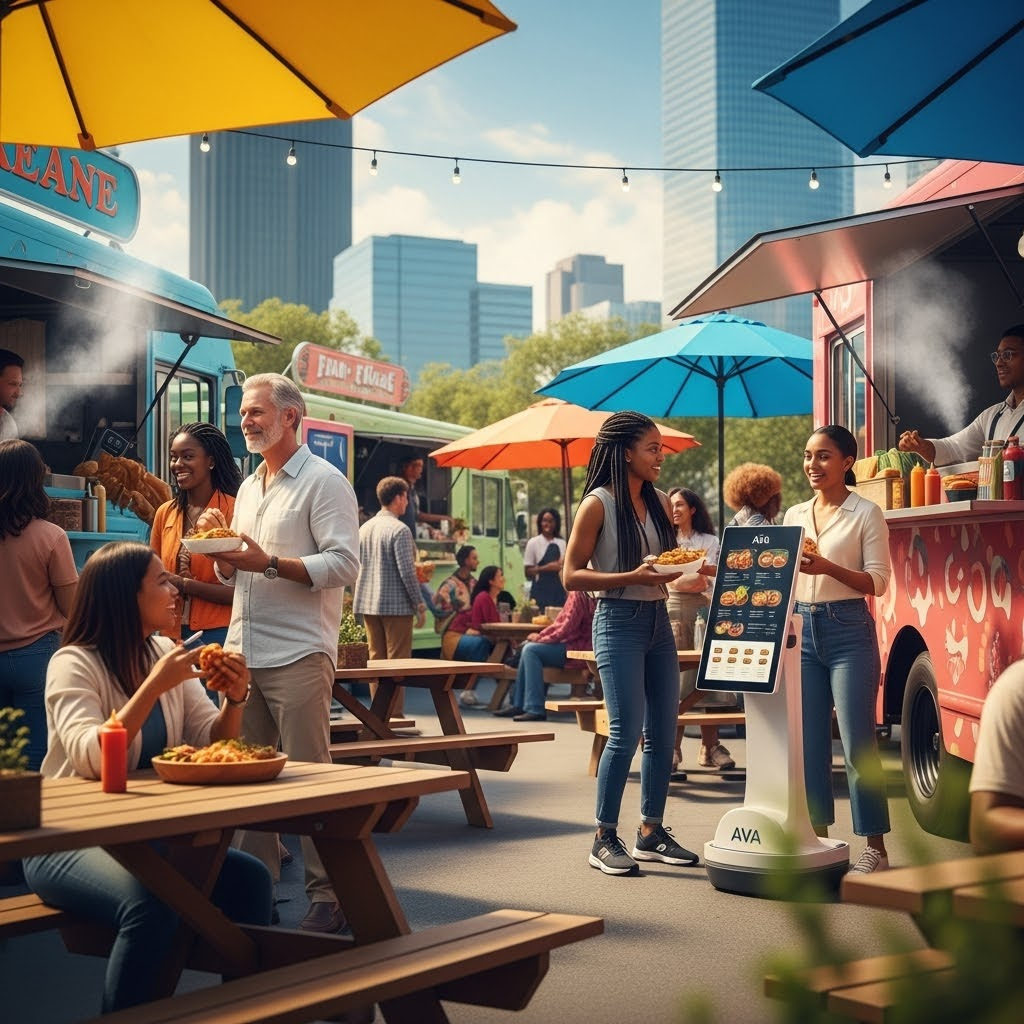

In [14]:
image_path = "/home/exokames/repository/exo-ai-fastapi/notebooks/generated_images/image_8ab91b2b-2066-4aa2-b69b-b7dbb4310186.png"

img = Image(filename=image_path)
display(img)

In [15]:
image_to_text = ImageToText()

# Read image file content
with open(image_path, "rb") as f:
    image_bytes = f.read()

# Analyze image and add to message content
try:
    # Use global ImageToText instance
    description = await image_to_text.analyze_image(
        image_bytes,
        "Please describe what you see in this image in the context of our conversation.",
    )
    print(description)
except Exception as e:
    print(f"Failed to analyze image: {e}")

Okay, based on the image, here's what I see in the context of our conversation (which I assume is about food, technology, and possibly marketing):

The image depicts a vibrant outdoor food truck event, likely in a city setting given the skyscrapers in the background. There are several food trucks with people lined up or being served. There are picnic tables where people are enjoying their food. The overall atmosphere is lively and social.

What's particularly relevant is the presence of a robot, labeled "AVA," near one of the food trucks. The robot has a screen displaying a menu from the food truck it's positioned near. It appears to be taking orders or providing information to customers. This suggests a potential integration of technology into the food truck experience, likely to improve efficiency, reduce lines, or offer a novel way to interact with customers.

In the context of our conversation, this image could represent:

*   **Technology in Food Service:** An example of how robot

In [17]:
from notebooks.audio import play_recorded_audio

# Start the complete dashboard
play_recorded_audio()


Audio Recorder for Jupyter Notebook

Instructions:
1. Run this cell to display the audio recorder
2. Click 'Start Recording' and allow microphone access
3. Speak into your microphone
4. Click 'Stop Recording' when finished
5. Use the buttons to play or download your recording
6. Use play_recorded_audio() to play audio in Python
7. Use save_recorded_audio() to save audio to file

Available functions after recording:
- play_recorded_audio(): Play the recorded audio
- save_recorded_audio(filename): Save audio to file
- get_audio_data(): Get raw audio bytes


No audio recorded yet. Please record audio first.
